<a href="https://colab.research.google.com/github/Lewis727/ECON-DKU/blob/master/Admission_Pred_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

In [56]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import accuracy_score

Data downloaded from https://www.kaggle.com/mohansacharya/graduate-admissions?rvi=1 <br>
The features are factors considered in the graduate school application process. TOEFL score and GPA are in old format. The target variable is the chance of getting admitted.<br>The task has been reframed as a classification problem. The dataset can be used to explore which aspect is weighed the most in the application process.

In [46]:
data=pd.read_csv('https://raw.githubusercontent.com/Lewis727/ECON-DKU/master/ECON211/week2/Admission_Predict.csv')
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [47]:
# slice the target variable into three ranks and turn it into a classifiction problem
data['adm_chance']=pd.qcut(data['Chance of Admit '],3,labels=np.arange(1,4,1))

# name the classes
data['Rank']=data['adm_chance'].apply(lambda x: 'High' if x==3 else 'Average' if x==2 else 'Low')

# rename columns and delete unused ones
data.drop(columns=['adm_chance','Chance of Admit '],inplace = True)
data.rename(columns = {'Rank':'adm_chance'},inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,adm_chance
0,337,118,4,4.5,4.5,9.65,1,High
1,324,107,4,4.0,4.5,8.87,1,Average
2,316,104,3,3.0,3.5,8.00,1,Average
3,322,110,3,3.5,2.5,8.67,1,High
4,314,103,2,2.0,3.0,8.21,0,Low


# Build Decision Tree

In [48]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['adm_chance'])
y = data['adm_chance']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.77


# Plot the Decision Tree

In [50]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

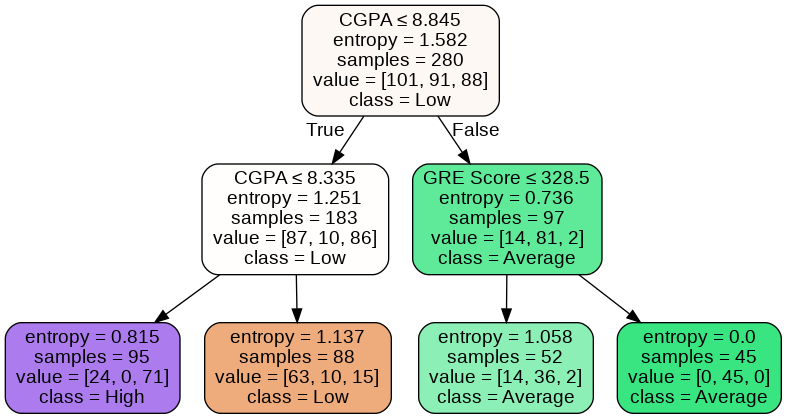

In [59]:
dot_data = StringIO()
feature_names = list(X.columns)
class_names = list(y.unique())
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names, class_names=['Low','Average','High'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('grad_admission_pred.png')
Image(graph.create_png())